In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import urllib
URL='http://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
urllib.request.urlretrieve(URL,'housing.csv')

('housing.csv', <http.client.HTTPMessage at 0x17d12ecbd50>)

In [3]:
data=pd.read_csv('housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


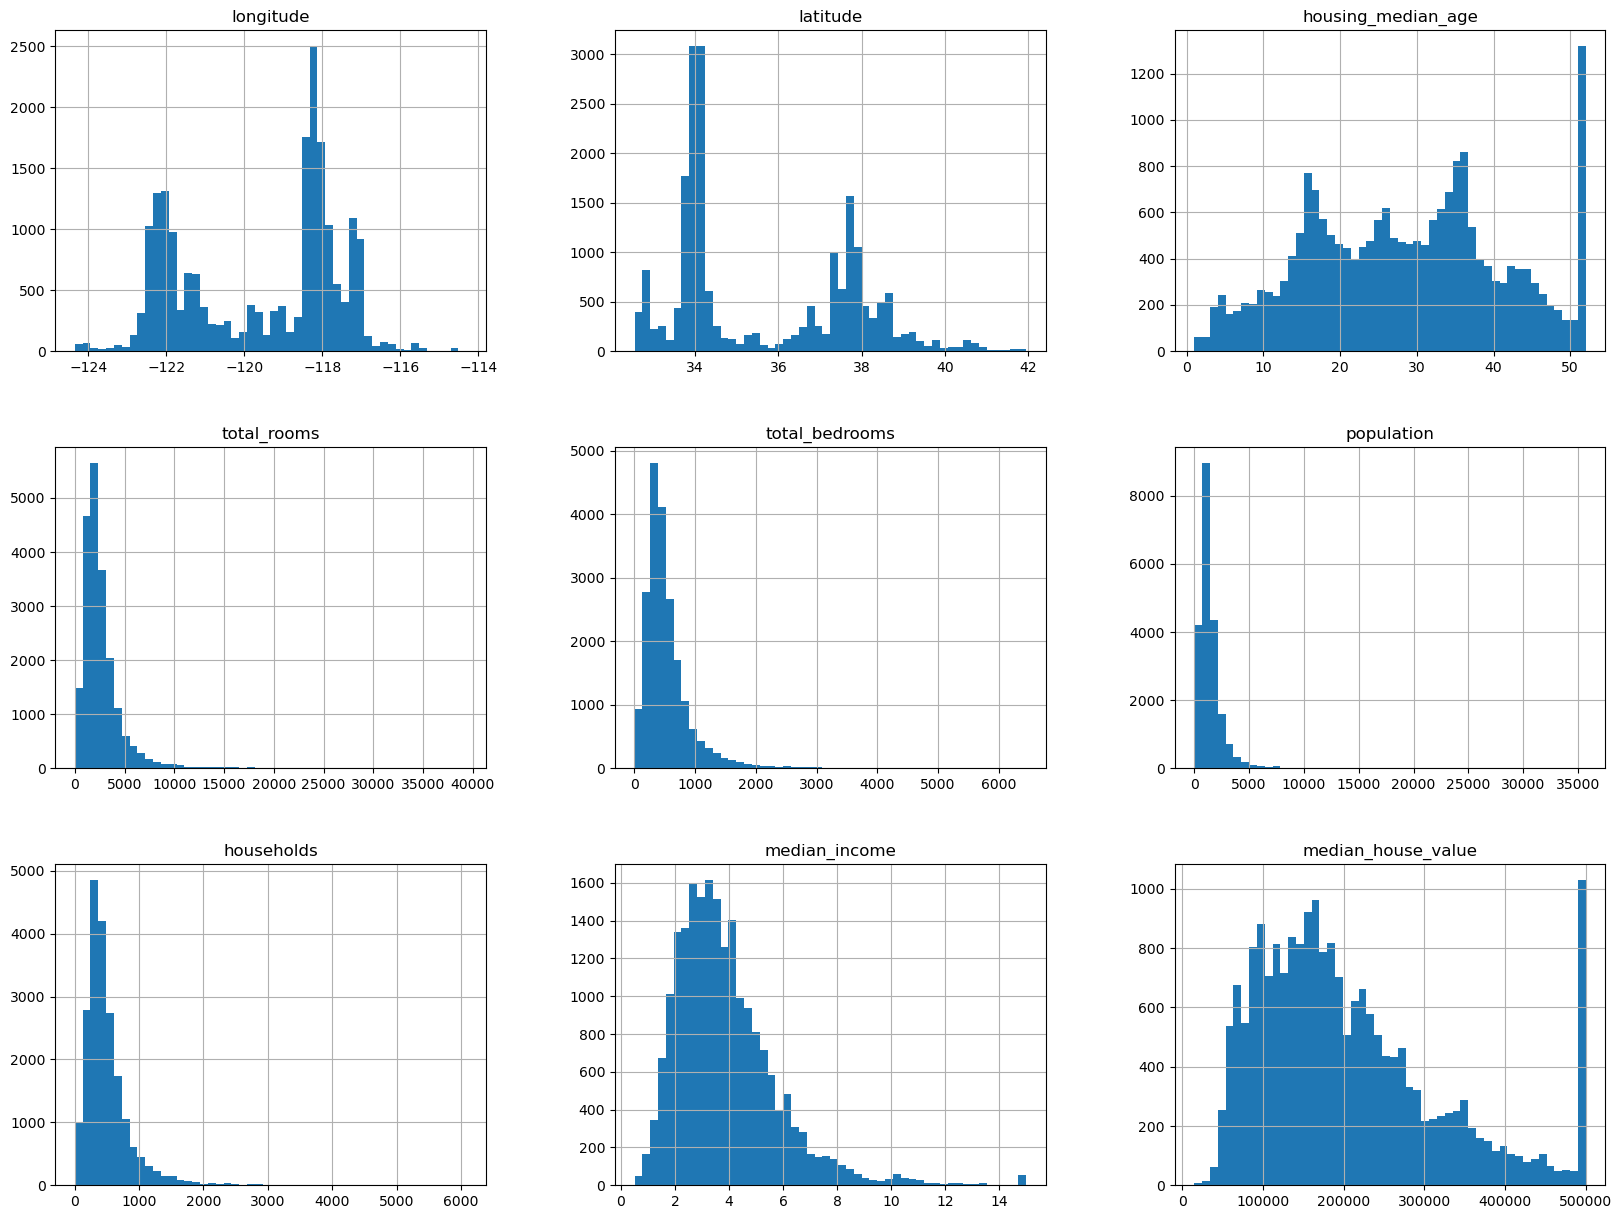

In [8]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(data,test_size=0.2,random_state=1)

In [11]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [18]:
import matplotlib.image as mpimg
url='https://raw.githubusercontent.com/ageron/\
handson-ml2/master/images/end_to_end_project/california.png'
urllib.request.urlretrieve(url,'california.png')
img=mpimg.imread('california.png')

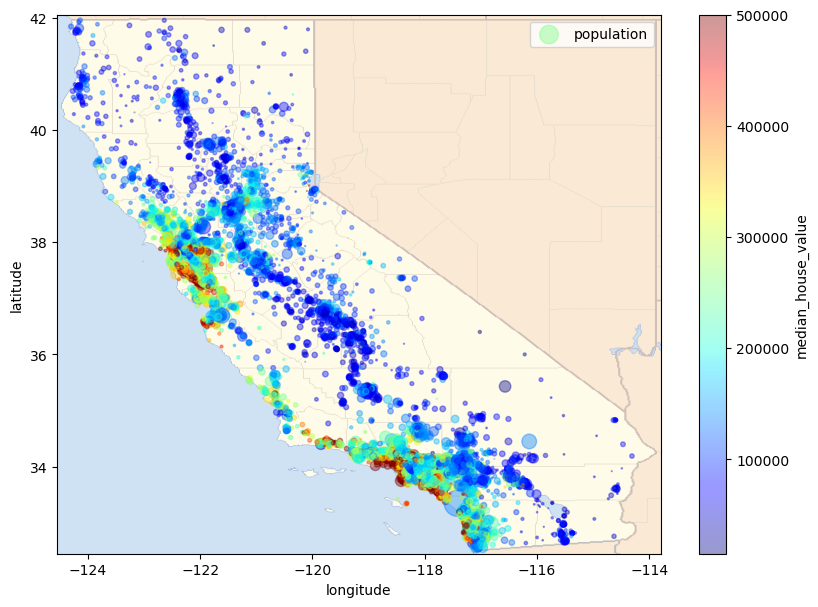

In [19]:
train_set.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
              s=train_set['population']/100,label='population',figsize=(10,7),
              c='median_house_value',cmap=plt.get_cmap('jet'))
plt.imshow(img,alpha=0.5,extent=[-124.55,-113.80,32.45,42.05])
plt.show()

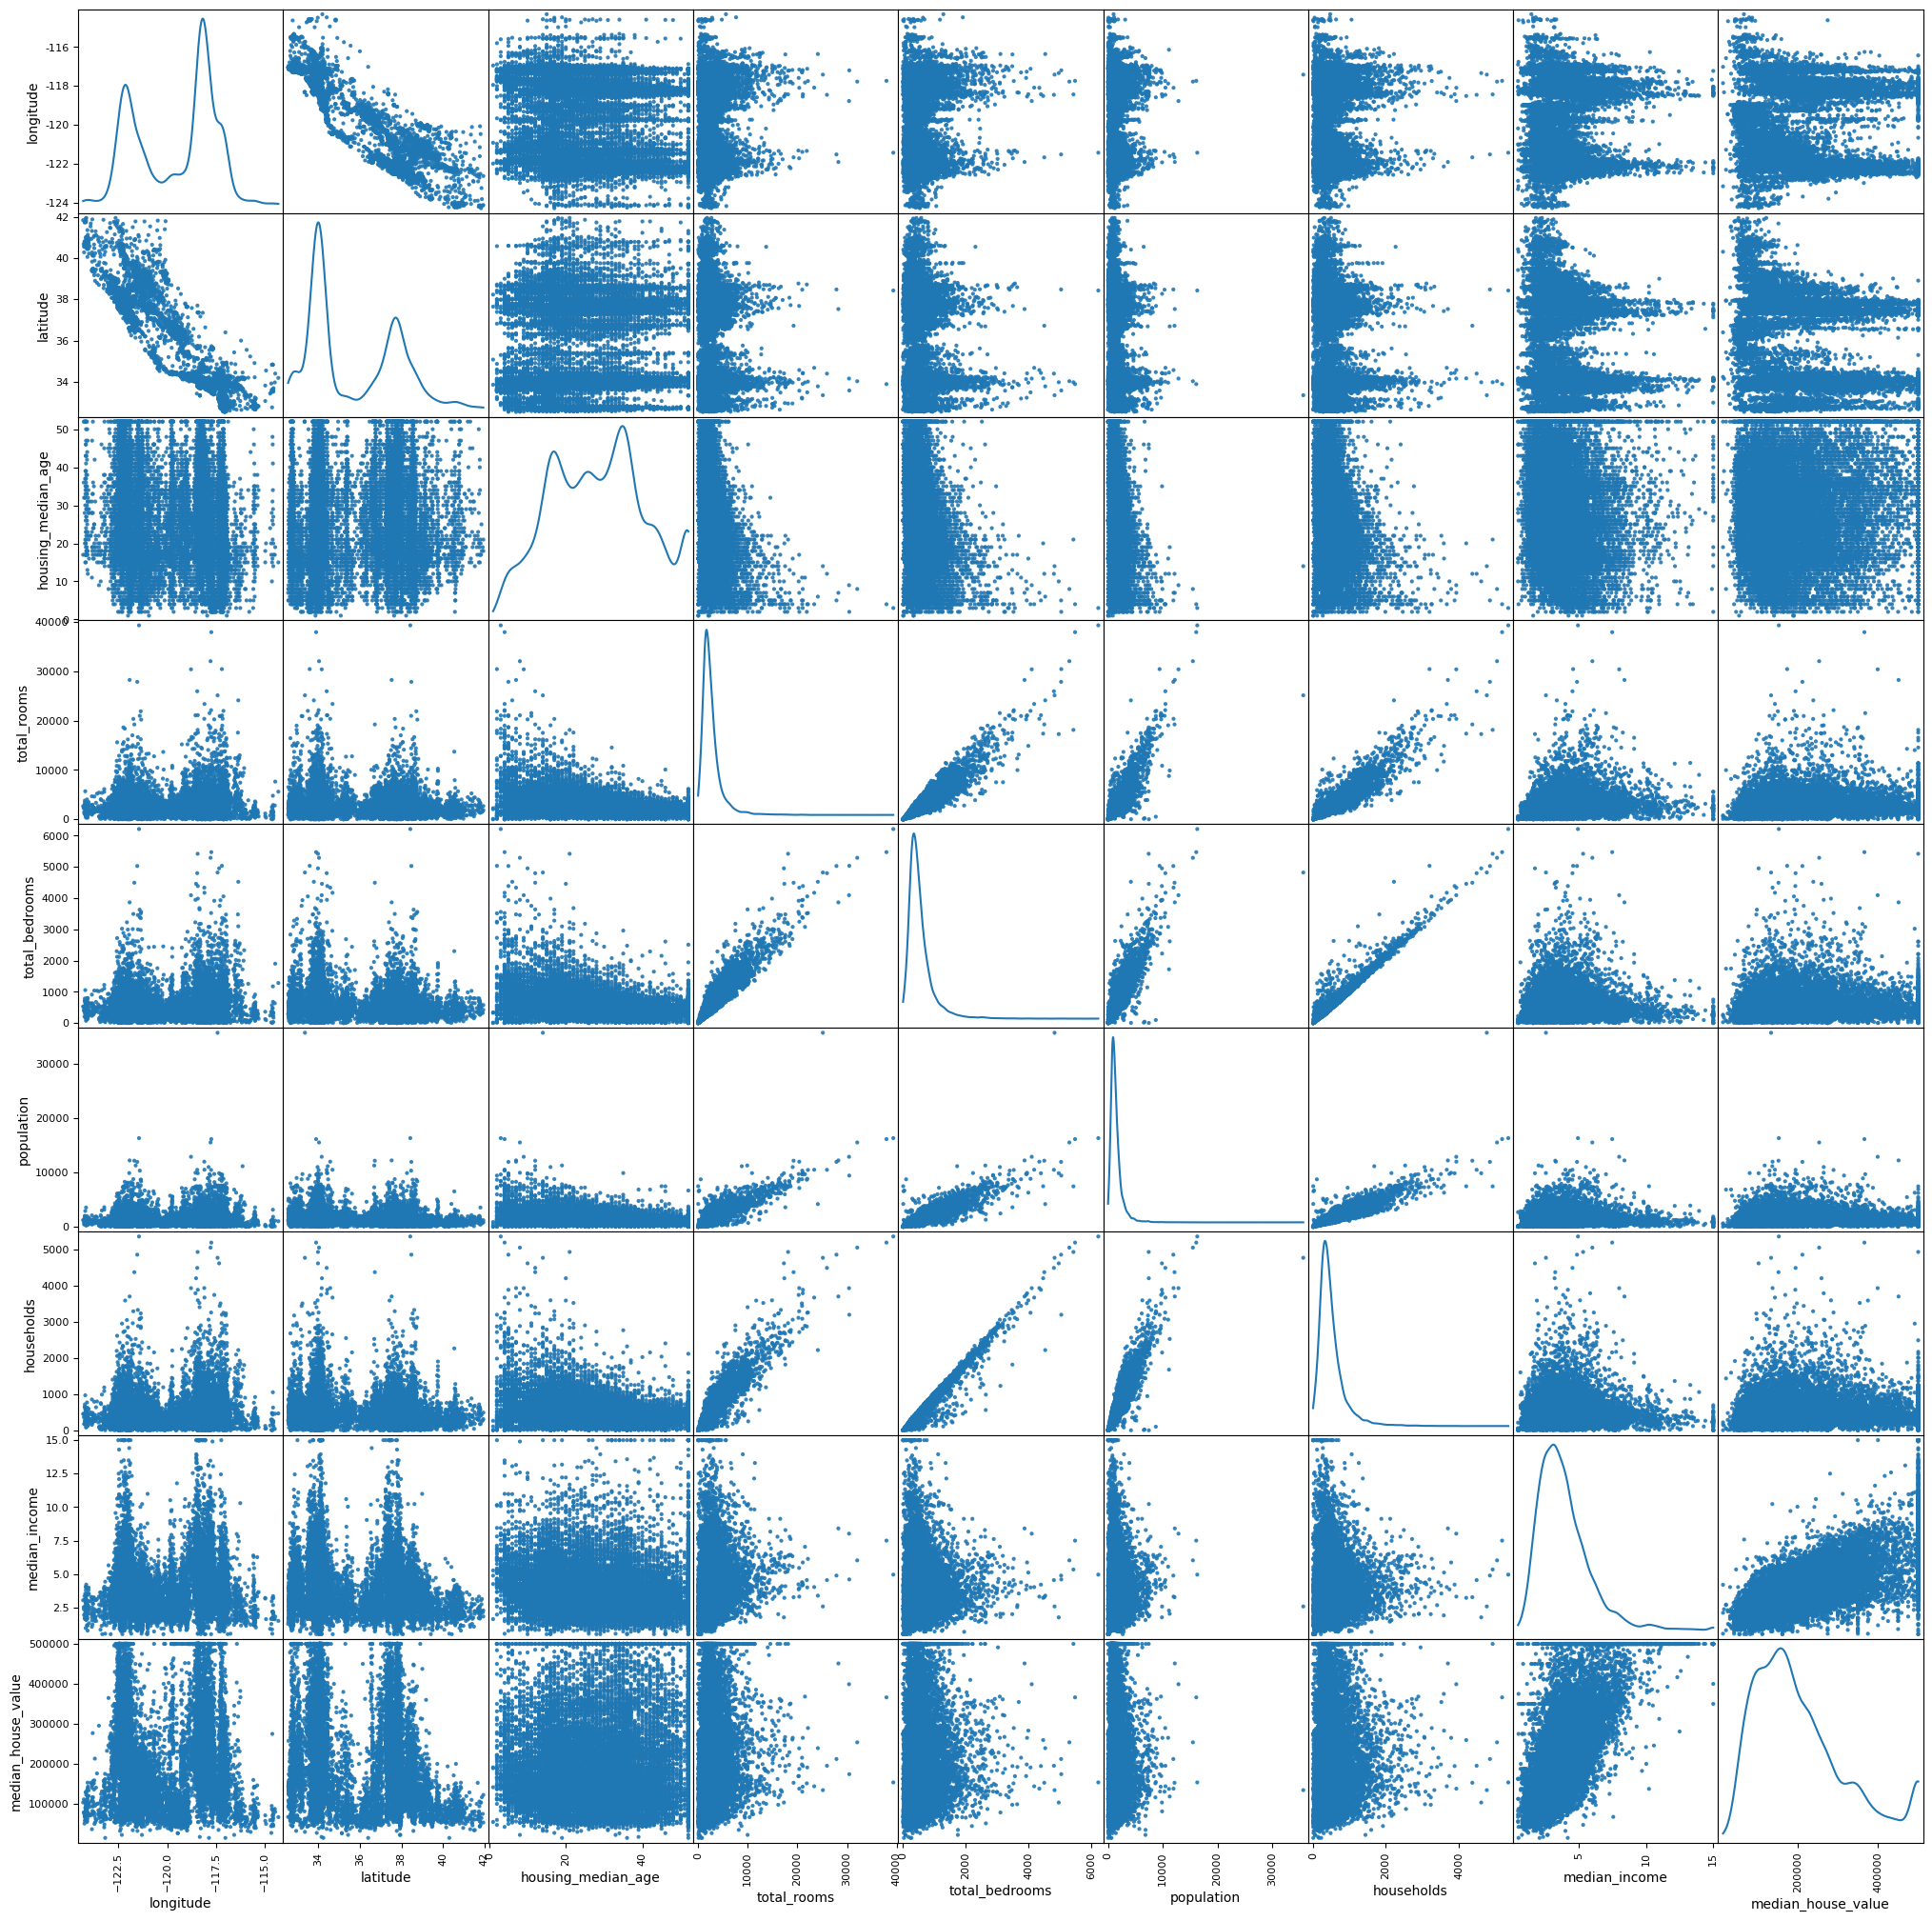

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_set,figsize=(25,25),alpha=0.9,diagonal="kde",marker='.')
plt.show()

In [22]:
corr=train_set.corr(numeric_only=True)
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688194
total_rooms           0.135514
housing_median_age    0.105758
households            0.066801
total_bedrooms        0.050560
population           -0.023884
longitude            -0.050893
latitude             -0.139374
Name: median_house_value, dtype: float64

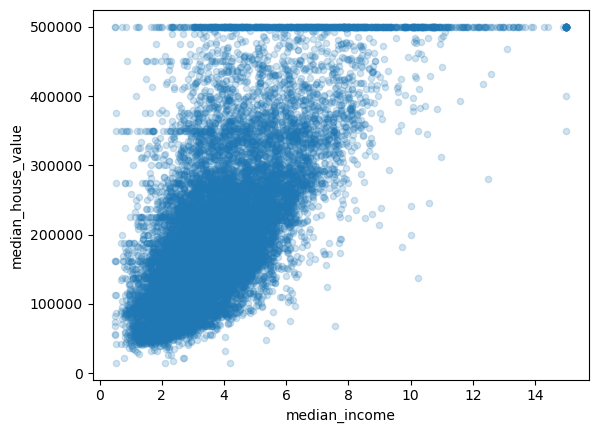

In [23]:
train_set.plot(kind='scatter', x='median_income', y='median_house_value',alpha=0.2)
plt.show()

In [24]:
x_train=train_set.drop('median_house_value',axis=1)
y_train=train_set['median_house_value'].copy()

In [26]:
x_train_num=x_train.drop('ocean_proximity',axis=1)

In [27]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
x_train_num_imp=imputer.fit_transform(x_train_num)
imputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2127.     ,  435.     ,
       1164.     ,  410.     ,    3.54455])

In [28]:
x_train_cat=x_train[['ocean_proximity']]
x_train_cat.value_counts()

ocean_proximity
<1H OCEAN          7341
INLAND             5193
NEAR OCEAN         2136
NEAR BAY           1837
ISLAND                5
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
x_train_cat_ohe=ohe.fit_transform(x_train_cat)
x_train_cat_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [30]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
pip_num=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])
pip_full=ColumnTransformer([
    ('num',pip_num,list(x_train)[:8]),
    ('cat',OneHotEncoder(),[list(x_train)[-1]])
])
x_train_prep=pip_full.fit_transform(x_train)
x_train_prep.shape

(16512, 13)

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train_prep,y_train)
lin_reg.score(x_train_prep,y_train)

0.647123440603417

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=1)
tree_reg.fit(x_train_prep, y_train)

DecisionTreeRegressor(random_state=1)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(random_state=1)
rf_reg.fit(x_train_prep, y_train)
rf_reg.score(x_train_prep, y_train)

0.9752676762656552

In [38]:
from sklearn.model_selection import cross_val_score

In [41]:
lin_reg=LinearRegression()
lin_scores=cross_val_score(lin_reg, x_train_prep, y_train, scoring='r2',cv=10) 
lin_scores

array([0.62322921, 0.6567226 , 0.65711307, 0.65417369, 0.61783282,
       0.65312461, 0.66419524, 0.64852354, 0.6389309 , 0.63806544])

In [42]:
lin_scores.mean(), lin_scores.std()

(0.6451911123781418, 0.014531909713038851)

In [43]:
tree_reg=DecisionTreeRegressor(random_state=1)
tree_scores=cross_val_score(tree_reg, x_train_prep, y_train, scoring='r2',cv=10)
tree_scores

array([0.62149636, 0.64117884, 0.66691466, 0.68318068, 0.62068836,
       0.64180119, 0.62812367, 0.63812617, 0.64381228, 0.6879263 ])

In [44]:
tree_scores.mean(), tree_scores.std()

(0.6473248506477172, 0.022865729428939278)

In [47]:
rf_reg=RandomForestRegressor(random_state=1)
rf_scores=cross_val_score(rf_reg, x_train_prep, y_train, scoring='r2',cv=10)
rf_scores

array([0.81037282, 0.8206976 , 0.83595298, 0.82104647, 0.80883116,
       0.8236809 , 0.83063172, 0.81539222, 0.81190395, 0.82505208])

In [48]:
rf_scores.mean(), rf_scores.std()

(0.8203561890777493, 0.008432792192187058)

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [50]:
param_distribs={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8)
}
rnd_reg=RandomForestRegressor(random_state=1)
rnd_search=RandomizedSearchCV(rnd_reg, param_distributions=param_distribs,
                             n_iter=10, cv=5, scoring='r2', random_state=1)
rnd_search.fit(x_train_prep, y_train)
rnd_search.best_params_

{'max_features': 6, 'n_estimators': 141}

In [51]:
rlt=rnd_search.cv_results_
for mean_score, params in zip(rlt['mean_test_score'], rlt['params']):
    print(mean_score, params)

0.8199906933163504 {'max_features': 6, 'n_estimators': 141}
0.7860664564439663 {'max_features': 1, 'n_estimators': 138}
0.8169325345090133 {'max_features': 4, 'n_estimators': 134}
0.7863368996436174 {'max_features': 1, 'n_estimators': 145}
0.7991070034887755 {'max_features': 2, 'n_estimators': 72}
0.8198697371798271 {'max_features': 6, 'n_estimators': 135}
0.8018083739706723 {'max_features': 2, 'n_estimators': 179}
0.8194622973787379 {'max_features': 5, 'n_estimators': 102}
0.810144795998276 {'max_features': 3, 'n_estimators': 140}
0.8198088417740893 {'max_features': 5, 'n_estimators': 157}


In [52]:
best_model=rnd_search.best_estimator_

In [53]:
x_test=test_set.drop('median_house_value',axis=1)
y_test=test_set['median_house_value'].copy()

In [54]:
x_test_prep=pip_full.transform(x_test)
best_model.score(x_test_prep, y_test)

0.8250885166982723

In [55]:
imp=best_model.feature_importances_
imp

array([1.20989054e-01, 1.09242771e-01, 4.74117188e-02, 3.39841941e-02,
       2.98389725e-02, 4.19180823e-02, 2.69768288e-02, 4.11093423e-01,
       1.59437210e-02, 1.53069989e-01, 3.19256477e-04, 2.36464129e-03,
       6.84734678e-03])

In [56]:
cat_one_hot_attribs=list(pip_full.named_transformers_['cat'].categories_[0])
features=list(x_train)[:8]+cat_one_hot_attribs
sorted(zip(imp, features),reverse=True)

[(0.41109342345252375, 'median_income'),
 (0.15306998927046686, 'INLAND'),
 (0.12098905445202936, 'longitude'),
 (0.10924277083069527, 'latitude'),
 (0.04741171883038796, 'housing_median_age'),
 (0.04191808225060058, 'population'),
 (0.03398419410680274, 'total_rooms'),
 (0.02983897245094751, 'total_bedrooms'),
 (0.026976828848004935, 'households'),
 (0.015943720967360363, '<1H OCEAN'),
 (0.006847346776206739, 'NEAR OCEAN'),
 (0.002364641286839896, 'NEAR BAY'),
 (0.0003192564771338848, 'ISLAND')]

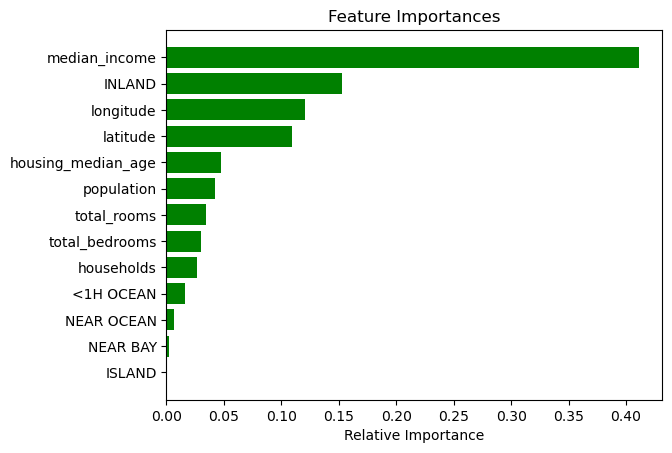

In [57]:
ind=np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
pip_final=Pipeline([
    ('preparation', pip_full),
    ('linear', best_model)
])
pip_final.fit(x_train, y_train)
final_model=pip_final

In [59]:
import joblib
joblib.dump(final_model, 'final_model_reg.pkl')

['final_model_reg.pkl']

In [60]:
model_reg_loaded=joblib.load('final_model_reg.pkl')

In [61]:
model_reg_loaded.predict(x_test)

array([335993.02836879,  62987.23404255, 242141.13475177, ...,
       315758.22695035, 237046.81560284, 114992.90780142])